# White Noise:
    
A special kind of time series dataset that has no specified pattern. A dataset is qualified to be a white noise by satisfying the following conditions
- Constant Mean $\mu$
- Constant Variance $\sigma^2$
- No Autocorrelation $\rho = corr(x_t, x_{t-1})$

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()
DATA_DIR = '../data'

In [5]:
raw_csv_data = pd.read_csv(os.path.join(DATA_DIR, "Index2018.csv"))
df_comp  = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Removing Surplus Data

In [6]:
df_comp['market_value'] = df_comp.spx
del df_comp['spx'], df_comp['dax'], df_comp['nikkei'], df_comp['ftse']
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [7]:
size = int(len(df_comp)*0.8)
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

## White Noise

In [8]:
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=len(df))

In [9]:
df['wn'] = wn

<ipython-input-9-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [10]:
df.head()

,market_value,wn
date,,
1994-01-07,469.90,960.051709
1994-01-10,475.27,637.750779
1994-01-11,474.13,703.023011
1994-01-12,474.17,901.070927
1994-01-13,472.47,1310.864309


In [11]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1094.566458
std,292.559287,290.454675
min,438.920000,155.782988
25%,914.620000,895.312444
50%,1144.650000,1092.567684
75%,1316.280729,1289.626765
max,1570.252238,2163.932589


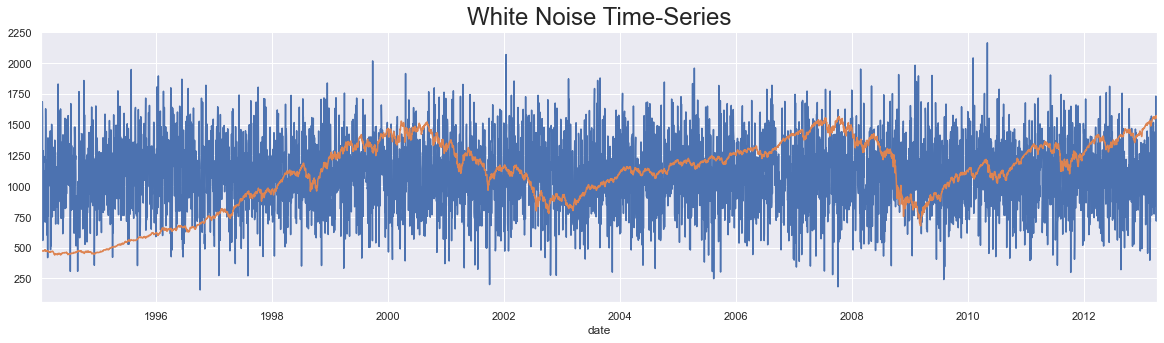

In [15]:
df.wn.plot(figsize=(20, 5))
df.market_value.plot()
plt.title("White Noise Time-Series", size=24)
plt.show()